In [57]:
import pandas as pd
import random
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import DBSCAN
import math
import statistics
pd.options.mode.chained_assignment = None  # default='warn'
import itertools
import json


#Convert CSV to Dataframe"C:\Users\seanh\Desktop\e4e\passive-acoustic-biodiversity\Pyrenote_clustering\data\pairwise_user_experiment.csv"
data = pd.read_csv("./data/pairwise_user_experiment.csv", header=[0])
data["FOLDER"] = data["IN FILE"].apply(lambda x: "")
data["LAST MOD BY"] = data["LAST MOD BY"].apply(lambda x: x.split(" ")[0])
data

IN FILE  CLIP LENGTH   OFFSET  \
0     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034   1.1839   
1     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034   6.9715   
2     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034   8.8594   
3     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034   9.9393   
4     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034  15.1890   
...                                                 ...          ...      ...   
2243  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  22.3916   
2244  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  23.7316   
2245  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  24.2615   
2246  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  24.7815   
2247  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  25.3315   

      DURATION  MAX FREQ  MIN FREQ  SAMPLE RATE           MANUAL ID  \
0       1.3399     24000         0        48000  White-vented Shama   
1       1.5479     24000         0        48000  White-vented Shama   
2       0.4500     24000         0        48000  White-vented Shama   
3       1.0800     24000         0        48000  White-vented Shama   
4       0.9299     24000         0        48000  White-vented Shama   
...        ...       ...       ...          ...                 ...   
2243    0.8100     24000         0        48000                bird   
2244    0.1600     24000         0        48000                bird   
2245    0.1200     24000         0        48000                bird   
2246    0.1600     24000         0        48000                bird   
2247    0.1400     24000         0        48000                bird   

      TIME_SPENT LAST MOD BY  CONFIDENCE  RETIRED  COUNTED FOLDER  
0        141.864       spres    0.577908    False        0         
1        141.864       spres    0.577908    False        0         
2        141.864       spres    0.577908    False        0         
3        141.864       spres    0.577908    False        0         
4        141.864       spres    0.577908    False        0         
...          ...         ...         ...      ...      ...    ...  
2243     311.194      Anshul    0.300511    False        0         
2244     311.194      Anshul    0.300511    False        0         
2245     311.194      Anshul    0.300511    False        0         
2246     311.194      Anshul    0.300511    False        0         
2247     311.194      Anshul    0.300511    False        0         

[2248 rows x 14 columns]

In [8]:
import json

with open('./experiment_results.json', 'r') as fcc_file:
    experiment_results = json.load(fcc_file)

In [9]:
experiment_results

{'get_silhoutte_confidence': {'0': [],
  '1': [0.24096544852776022,
   0.0,
   0.2999160376409282,
   0.4792843790687046,
   0.18504286305925796,
   0.8402229782886823,
   0.0,
   0.734581593641841,
   0.400049083947034,
   0.7198294431111709,
   0.4414954504377533,
   0.33841422420824663,
   0.4650160536251593,
   0.7748296155888471,
   0.7666859875930314,
   0.5296807724748873,
   0.4322107826494103,
   0.4272507155372004,
   0.40915350692617924,
   0.0,
   0.0,
   0.7939766399186359,
   0.0,
   0.24096544852776022,
   0.7939766399186359,
   0.0,
   0.0,
   0.8925375029739722,
   0.0,
   0.39266035371750085,
   0.2996703984127571,
   0.24821616194851737,
   0.32900984482952994,
   0.24732418620586138,
   0.0,
   0.49725896900481537,
   0.562006293344498,
   0.4650160536251593,
   0.0,
   0.0,
   0.4888399869847811,
   0.0,
   0.23152266148840805,
   0.0,
   0.546128111162963,
   0.3403795485693406,
   0.9828134534307709,
   0.21006140474784527,
   0.9880600775477343,
   0.36558018835

In [10]:
def process_results(experiment_results, meanify=True):
    print(experiment_results)
    print ("trails ran",  experiment_results["TRIAL COUNT"])
    del experiment_results["TRIAL COUNT"]
    
    for confidence_func in experiment_results:
        confidence_dirc = experiment_results[confidence_func]
        print("Time for ", confidence_func, " was ", confidence_dirc["TIMING"])
        del confidence_dirc["TIMING"]
        users_count = list(confidence_dirc.keys())
        if meanify:
            for count in users_count:
                experiment_results[confidence_func][count] = np.array(confidence_dirc[count]).mean()
    return experiment_results

processed = process_results(experiment_results, False)
generate_graph_all(processed)

{'get_silhoutte_confidence': {'0': [], '1': [0.24096544852776022, 0.0, 0.2999160376409282, 0.4792843790687046, 0.18504286305925796, 0.8402229782886823, 0.0, 0.734581593641841, 0.400049083947034, 0.7198294431111709, 0.4414954504377533, 0.33841422420824663, 0.4650160536251593, 0.7748296155888471, 0.7666859875930314, 0.5296807724748873, 0.4322107826494103, 0.4272507155372004, 0.40915350692617924, 0.0, 0.0, 0.7939766399186359, 0.0, 0.24096544852776022, 0.7939766399186359, 0.0, 0.0, 0.8925375029739722, 0.0, 0.39266035371750085, 0.2996703984127571, 0.24821616194851737, 0.32900984482952994, 0.24732418620586138, 0.0, 0.49725896900481537, 0.562006293344498, 0.4650160536251593, 0.0, 0.0, 0.4888399869847811, 0.0, 0.23152266148840805, 0.0, 0.546128111162963, 0.3403795485693406, 0.9828134534307709, 0.21006140474784527, 0.9880600775477343, 0.36558018835688505, 0.990932134164815, 0.6699191330025871, 0.4931213245142011, 0.3142964964886012, 0.9499999965003028, 0.0, 0.7530536882401148, 0.585724525805605

NameError: name 'generate_graph_all' is not defined

In [11]:
processed

{'get_silhoutte_confidence': {'0': [],
  '1': [0.24096544852776022,
   0.0,
   0.2999160376409282,
   0.4792843790687046,
   0.18504286305925796,
   0.8402229782886823,
   0.0,
   0.734581593641841,
   0.400049083947034,
   0.7198294431111709,
   0.4414954504377533,
   0.33841422420824663,
   0.4650160536251593,
   0.7748296155888471,
   0.7666859875930314,
   0.5296807724748873,
   0.4322107826494103,
   0.4272507155372004,
   0.40915350692617924,
   0.0,
   0.0,
   0.7939766399186359,
   0.0,
   0.24096544852776022,
   0.7939766399186359,
   0.0,
   0.0,
   0.8925375029739722,
   0.0,
   0.39266035371750085,
   0.2996703984127571,
   0.24821616194851737,
   0.32900984482952994,
   0.24732418620586138,
   0.0,
   0.49725896900481537,
   0.562006293344498,
   0.4650160536251593,
   0.0,
   0.0,
   0.4888399869847811,
   0.0,
   0.23152266148840805,
   0.0,
   0.546128111162963,
   0.3403795485693406,
   0.9828134534307709,
   0.21006140474784527,
   0.9880600775477343,
   0.36558018835

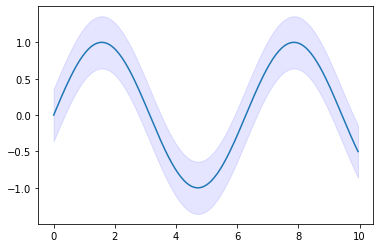

In [13]:
from matplotlib import pyplot as plt
import numpy as np
# Create the data set
x = np.arange(0, 10, 0.05)
y = np.sin(x)
 #Define the confidence interval
ci = 0.1 * np.std(y) / np.mean(y)
# Plot the sinus function
plt.plot(x, y)
# Plot the confidence interval
plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.1)
plt.show()

In [53]:
def plot_change_in_ci(experiment_results):
    for confidence_func in experiment_results:
        confidence_dirc = experiment_results[confidence_func]
        
        users_count = list(confidence_dirc.keys())
        raw_score = list(confidence_dirc.values())
        CI = []
        #plot CI
        for count in users_count:
            scores_for_count = np.array(raw_score[int(count)-1])                            
            ci = 0.1 * np.std(scores_for_count) / np.mean(scores_for_count)
            CI.append(ci * 2)
        p = plt.plot(users_count, CI, label=(confidence_func))
        

    #Throw in some fancy formatting
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title("Change in Confidence Interval of User Scores per Function")
    plt.xlabel("Number of users who annotated")
    plt.ylabel("CI of Function")
    plt.show()

def generate_graph_all(experiment_results):
    #For each filename, plot the performance of each confidence function
    for confidence_func in experiment_results:
        confidence_dirc = experiment_results[confidence_func]
        
        users_count = list(confidence_dirc.keys())
        raw_score = list(confidence_dirc.values())
        
        #plot mean
        score_mean = []
        for count in users_count:
            score_mean.append(np.array(raw_score[int(count)-1]).mean())
        p = plt.plot(users_count, score_mean, label=(confidence_func))
        #plot CI
        for count in users_count:
            scores_for_count = np.array(raw_score[int(count)-1])
            y = scores_for_count.mean()                             
            ci = 0.1 * np.std(scores_for_count) / np.mean(scores_for_count)
            plt.fill_between(count, (y-ci), (y+ci), color=p[0].get_color(), alpha=0.5)
        

    #Throw in some fancy formatting
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title("Change in user agreement scores per Function")
    plt.xlabel("Number of users who annotated")
    plt.ylabel("Average Confidence of Function For Number Of Users")
    plt.show()

C:\ProgramData\Miniconda3\envs\species-id\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice.
C:\ProgramData\Miniconda3\envs\species-id\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.


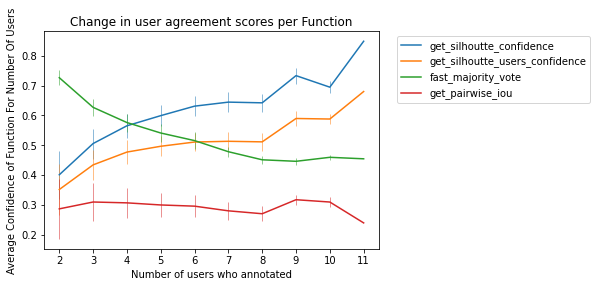

In [54]:
generate_graph_all(processed)

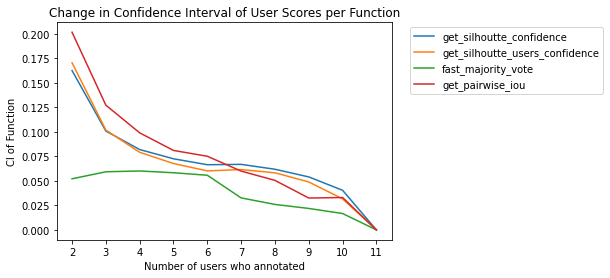

In [55]:
plot_change_in_ci(processed)

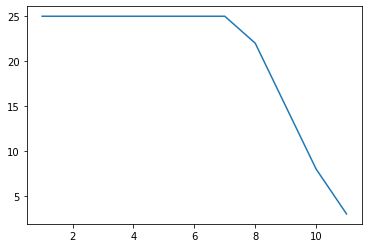

In [67]:
def plot_users_count_per_file(data):
    file_user_counts  =  data.groupby(["IN FILE", "LAST MOD BY"]).count().reset_index().groupby(["IN FILE"]).count()[["LAST MOD BY"]]
    max_user_count =  file_user_counts["LAST MOD BY"].max()
    
    file_counts = []
    for i in range(max_user_count):
        count_of_files_with_atleast_i_users = file_user_counts[file_user_counts["LAST MOD BY"] >= i].shape[0]
        file_counts.append(count_of_files_with_atleast_i_users)
        
    p = plt.plot(range(1,max_user_count+1), file_counts)
    
    
plot_users_count_per_file(data)

In [60]:
data

IN FILE  CLIP LENGTH   OFFSET  \
0     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034   1.1839   
1     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034   6.9715   
2     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034   8.8594   
3     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034   9.9393   
4     XC23899_-_White-vented_Shama_-_Copsychus_niger...      61.1034  15.1890   
...                                                 ...          ...      ...   
2243  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  22.3916   
2244  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  23.7316   
2245  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  24.2615   
2246  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  24.7815   
2247  XC688950_-_Balearic_Warbler_-_Sylvia_balearica...      25.9531  25.3315   

      DURATION  MAX FREQ  MIN FREQ  SAMPLE RATE           MANUAL ID  \
0       1.3399     24000         0        48000  White-vented Shama   
1       1.5479     24000         0        48000  White-vented Shama   
2       0.4500     24000         0        48000  White-vented Shama   
3       1.0800     24000         0        48000  White-vented Shama   
4       0.9299     24000         0        48000  White-vented Shama   
...        ...       ...       ...          ...                 ...   
2243    0.8100     24000         0        48000                bird   
2244    0.1600     24000         0        48000                bird   
2245    0.1200     24000         0        48000                bird   
2246    0.1600     24000         0        48000                bird   
2247    0.1400     24000         0        48000                bird   

      TIME_SPENT LAST MOD BY  CONFIDENCE  RETIRED  COUNTED FOLDER  
0        141.864       spres    0.577908    False        0         
1        141.864       spres    0.577908    False        0         
2        141.864       spres    0.577908    False        0         
3        141.864       spres    0.577908    False        0         
4        141.864       spres    0.577908    False        0         
...          ...         ...         ...      ...      ...    ...  
2243     311.194      Anshul    0.300511    False        0         
2244     311.194      Anshul    0.300511    False        0         
2245     311.194      Anshul    0.300511    False        0         
2246     311.194      Anshul    0.300511    False        0         
2247     311.194      Anshul    0.300511    False        0         

[2248 rows x 14 columns]

In [68]:
processed

{'get_silhoutte_confidence': {'0': [],
  '1': [0.24096544852776022,
   0.0,
   0.2999160376409282,
   0.4792843790687046,
   0.18504286305925796,
   0.8402229782886823,
   0.0,
   0.734581593641841,
   0.400049083947034,
   0.7198294431111709,
   0.4414954504377533,
   0.33841422420824663,
   0.4650160536251593,
   0.7748296155888471,
   0.7666859875930314,
   0.5296807724748873,
   0.4322107826494103,
   0.4272507155372004,
   0.40915350692617924,
   0.0,
   0.0,
   0.7939766399186359,
   0.0,
   0.24096544852776022,
   0.7939766399186359,
   0.0,
   0.0,
   0.8925375029739722,
   0.0,
   0.39266035371750085,
   0.2996703984127571,
   0.24821616194851737,
   0.32900984482952994,
   0.24732418620586138,
   0.0,
   0.49725896900481537,
   0.562006293344498,
   0.4650160536251593,
   0.0,
   0.0,
   0.4888399869847811,
   0.0,
   0.23152266148840805,
   0.0,
   0.546128111162963,
   0.3403795485693406,
   0.9828134534307709,
   0.21006140474784527,
   0.9880600775477343,
   0.36558018835

In [72]:
experiment_results['get_silhoutte_confidence']['1']

[0.24096544852776022,
 0.0,
 0.2999160376409282,
 0.4792843790687046,
 0.18504286305925796,
 0.8402229782886823,
 0.0,
 0.734581593641841,
 0.400049083947034,
 0.7198294431111709,
 0.4414954504377533,
 0.33841422420824663,
 0.4650160536251593,
 0.7748296155888471,
 0.7666859875930314,
 0.5296807724748873,
 0.4322107826494103,
 0.4272507155372004,
 0.40915350692617924,
 0.0,
 0.0,
 0.7939766399186359,
 0.0,
 0.24096544852776022,
 0.7939766399186359,
 0.0,
 0.0,
 0.8925375029739722,
 0.0,
 0.39266035371750085,
 0.2996703984127571,
 0.24821616194851737,
 0.32900984482952994,
 0.24732418620586138,
 0.0,
 0.49725896900481537,
 0.562006293344498,
 0.4650160536251593,
 0.0,
 0.0,
 0.4888399869847811,
 0.0,
 0.23152266148840805,
 0.0,
 0.546128111162963,
 0.3403795485693406,
 0.9828134534307709,
 0.21006140474784527,
 0.9880600775477343,
 0.36558018835688505,
 0.990932134164815,
 0.6699191330025871,
 0.4931213245142011,
 0.3142964964886012,
 0.9499999965003028,
 0.0,
 0.7530536882401148,
 0.58

In [73]:
experiment_results['get_silhoutte_confidence']['1'] == processed['get_silhoutte_confidence']['1']

True